In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
ds = pd.read_csv('datasets/AIS_2017_01_Zone01.csv')
'''
MMIS: Maritime mobile service identity
SOG:  Speed over ground
COG:  Course over ground
'''
ds

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo
0,366940480,2017-01-04T11:39:36,52.48730,-174.02316,10.0,-140.7,267.0,EARLY DAWN,IMO7821130,WDB7319,1001.0,undefined,32.95,8.82,4.0,31.0
1,366940480,2017-01-04T11:40:45,52.48718,-174.02835,10.0,-141.6,266.0,EARLY DAWN,IMO7821130,WDB7319,1001.0,undefined,32.95,8.82,4.0,31.0
2,366940480,2017-01-04T11:42:26,52.48705,-174.03608,10.0,-142.3,267.0,EARLY DAWN,IMO7821130,WDB7319,1001.0,undefined,32.95,8.82,4.0,31.0
3,366940480,2017-01-04T13:51:07,52.41575,-174.60041,9.1,-154.0,251.0,EARLY DAWN,IMO7821130,WDB7319,1001.0,undefined,32.95,8.82,4.0,31.0
4,366940480,2017-01-04T13:55:17,52.41311,-174.61718,9.1,-157.3,251.0,EARLY DAWN,IMO7821130,WDB7319,1001.0,undefined,32.95,8.82,4.0,31.0
5,366940480,2017-01-04T14:06:37,52.40527,-174.66192,9.0,-154.0,252.0,EARLY DAWN,IMO7821130,WDB7319,1001.0,undefined,32.95,8.82,4.0,31.0
6,366940480,2017-01-04T14:19:57,52.39625,-174.71461,9.1,-159.0,249.0,EARLY DAWN,IMO7821130,WDB7319,1001.0,undefined,32.95,8.82,4.0,31.0
7,366940480,2017-01-04T14:24:36,52.39278,-174.73318,9.1,-157.0,250.0,EARLY DAWN,IMO7821130,WDB7319,1001.0,undefined,32.95,8.82,4.0,31.0
8,366940480,2017-01-04T14:29:17,52.38917,-174.75174,9.3,-157.9,252.0,EARLY DAWN,IMO7821130,WDB7319,1001.0,undefined,32.95,8.82,4.0,31.0
9,366940480,2017-01-04T14:54:26,52.36916,-174.85096,9.2,-157.1,251.0,EARLY DAWN,IMO7821130,WDB7319,1001.0,undefined,32.95,8.82,4.0,31.0


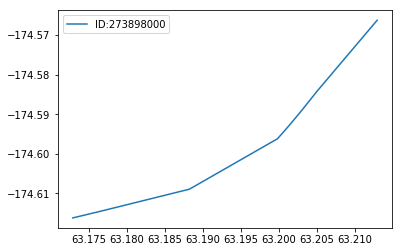

In [70]:
x=np.array(ds[ds['MMSI']==273898000]['LAT'])[149:159:]
y=np.array(ds[ds['MMSI']==273898000]['LON'])[149:159:]
sog=np.array(ds[ds['MMSI']==273898000]['SOG'])[149:159:]
cog=np.array(ds[ds['MMSI']==273898000]['SOG'])[149:159:]
velx=list(map(lambda x,y:math.cos(math.radians(x))*y,cog,sog))
vely=list(map(lambda x,y:math.sin(math.radians(x))*y,cog,sog))
time=np.array(ds[ds['MMSI']==273898000]['BaseDateTime'])[149:159:]

#sog2=np.array(ds[ds['MMSI']==477444700]['SOG'])[0:100:1]
#sog3=np.array(ds[ds['MMSI']==370024000]['SOG'])[0:100:1]
#sog4=np.array(ds[ds['MMSI']==273898000]['SOG'])[0:100:1]

plt.plot(x, y, label = 'ID:273898000')
#plt.plot(range(len(sog2)), sog2, label = 'SOG2')
#plt.plot(range(len(sog3)), sog3, label = 'SOG3')
#plt.plot(range(len(sog4)), sog4, label = 'SOG4')

plt.legend()
plt.show()

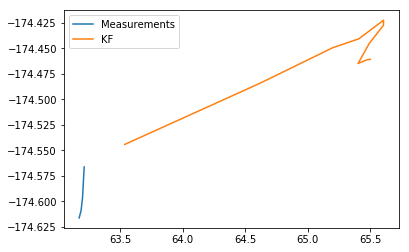

In [69]:
#-----bulid model-----#
'''
xk = A.xk-1 + B.uk + wk-1
zk = H.xk + vk
'''
kf=[]
x0=x[0]
y0=y[0]
P0=1
A=B=1
xx=[]
yy=[]
Q=0.1
R=0.1
for c in range(0,len(x)):
    i,j,vx,vy = x[c],y[c],velx[c],vely[c]
    
    #-----time-update(prediction)-----#
    '''
    xk = A.xk-1 + B.uk
    Pk = A.Pk-1.At + Q
    '''
    xk=x0+vx
    yk=y0+vy
    Pk=P0+Q
    #-----measurement-update(correction)-----#
    '''
    Kk = (Pk.Ht) / (H.Pk.Ht + R)
    xk = xk + Kk(zk - K.xk)
    Pk = (1 - Kk.H)Pk
    '''
    Kk=Pk/(Pk+R)
    xk=xk+Kk*(i-xk)
    yk=yk+Kk*(j-yk)
    Pk=(1-Kk)*Pk
    #-----append estimate----#
    xx.append(xk)
    yy.append(yk)
    x0=xk
    y0=yk
    P0=Pk
plt.plot(x, y, label='Measurements')
plt.plot(xx,yy, label = 'KF')
plt.legend()
plt.show()
